<a href="https://colab.research.google.com/github/Kuldeep995/Machine_Learning/blob/master/1801093MLassignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Synthetic data generation and simple curve fitting

In [ ]:
import numpy as np
import pandas as pd
import math 
import sys
import pylab
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn import datasets
import warnings 
warnings.filterwarnings("ignore")
X = np.random.uniform(0,1,10)
PI = math.pi  
Y = []  

for i in range(10): 
    Y.append(math.sin(2*PI*X[i])) 
    i+=1
noice = np.random.normal(0,.3,10)
Y = Y + noice


cutoff = int(0.8 * 10)
perm = np.random.permutation(10)
X = X[perm]
Y = Y[perm]
X_test = X[cutoff:]
Y_test = Y[cutoff:]

X_train = X[:cutoff]
Y_train = Y[:cutoff]

print("training setX:\n",X_train)
print("training setY:\n",Y_train)
print("testing setX:\n",X_test)
print("testing setY:\n",Y_test)

def train(MAX_ITER = 2000, ALPHA = 0.05):
	train_error = []
	test_error = []
	rmse_error = []

	for DEGREE in range(1, 10):
		print("\ndegree:"+str(DEGREE))
		W = np.random.uniform(0, 1, DEGREE + 1)

		for i in range(MAX_ITER):
			cost = 0.0
			cost_val = 0.0
			sum_ = 0.0
			rmse = 0.0
			sum_list = np.zeros(DEGREE + 1)
			for m in range(len(X_train)):
				X = X_train[m]
				Y = Y_train[m]
				X_power = np.array([X**j for j in range(DEGREE+1)])

				Y_pred = np.dot(W, X_power)
				sum_ = (Y_pred - Y)
				sum_list_here = [sum_ * j for j in X_power]
				sum_list += sum_list_here

				cost += (Y - Y_pred)**2

			cost/= (2 * (m+1))

			W -= (ALPHA/(len(X_train))) * sum_list
			print("cost at iteration ("+str(i)+"/"+str(MAX_ITER)+"): "+str(cost), end="\r")

			for m in range(len(X_test)):
				X = X_test[m]
				Y = Y_test[m]
				X_power = np.array([X**j for j in range(DEGREE+1)])

				Y_pred = np.dot(W, X_power)

				cost_val += (Y - Y_pred)**2
				rmse += (Y - Y_pred)**2

			cost_val /= 2* (m+1)
			rmse = math.sqrt(float(rmse / (m + 1)))

		train_error.append(cost)
		test_error.append(cost_val)
		rmse_error.append(rmse)
		np.save("W_"+str(DEGREE), W)

	return train_error, test_error, rmse_error

train()


training setX:
 [0.16408824 0.87617859 0.49548752 0.06030608 0.36250803 0.62518181
 0.48650021 0.81441946]
training setY:
 [ 0.81679879 -0.9257825  -0.1674597   0.55331559  0.99453607 -0.81083373
 -0.48491151 -1.39025796]
testing setX:
 [0.62325145 0.01090157]
testing setY:
 [-0.69302514 -0.23963499]

degree:1
cost at iteration (1999/2000): 0.07841630278255915
degree:2
cost at iteration (1999/2000): 0.07522291280494017
degree:3
cost at iteration (1999/2000): 0.07829113683135086
degree:4
cost at iteration (1999/2000): 0.07383799856733826
degree:5
cost at iteration (1999/2000): 0.07007638476908168
degree:6
cost at iteration (1999/2000): 0.06844962258893703
degree:7
cost at iteration (1999/2000): 0.07012405195965613
degree:8
cost at iteration (1999/2000): 0.06226989884196335
degree:9


([0.07841630278255915,
  0.07522291280494017,
  0.07829113683135086,
  0.07383799856733826,
  0.07007638476908168,
  0.06844962258893703,
  0.07012405195965613,
  0.06226989884196335,
  0.06277216780545859],
 [0.4489472010112863,
  0.3506764358267762,
  0.30280063522375544,
  0.335708438509293,
  0.32046623177775524,
  0.34507282138186407,
  0.34721869517748594,
  0.34950394159175513,
  0.3730659972294529],
 [0.9475729006375038,
  0.8374681317241585,
  0.77820387460325,
  0.8194003154860181,
  0.8005825775992821,
  0.8307500483079903,
  0.8333291008689016,
  0.8360669131017626,
  0.863789322959543])

2.Visualization of the dataset and the fitted curves 

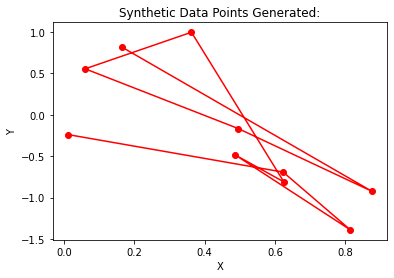

do you want to train (part 1) again? y
do you want to regenerate the data? n

degree:1
cost at iteration (1999/2000): 0.07841653404861462
degree:2
cost at iteration (1999/2000): 0.07523695965584194
degree:3
cost at iteration (1999/2000): 0.07608922823716638
degree:4
cost at iteration (1999/2000): 0.07734961156541584
degree:5
cost at iteration (1999/2000): 0.07052063917388442
degree:6
cost at iteration (1999/2000): 0.06774558634891706
degree:7
cost at iteration (1999/2000): 0.06581992370100352
degree:8
cost at iteration (1999/2000): 0.06339289499475845
degree:9
cost at iteration (1999/2000): 0.0625866195899419

test cost, degree1: 0.44881479929117074
train cost, degree1: 0.0784165204972013
test cost, degree2: 0.3591160819229935
train cost, degree2: 0.07523695619850675
test cost, degree3: 0.31093037995579775
train cost, degree3: 0.07608795118160423
test cost, degree4: 0.33720742540481297
train cost, degree4: 0.07734690026232992
test cost, degree5: 0.31265518090763605
train cost, degree5:

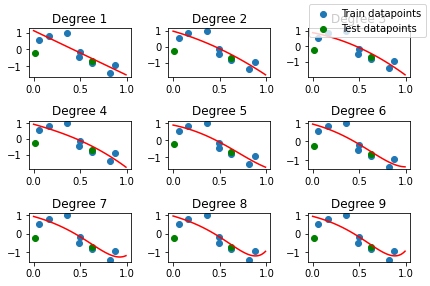

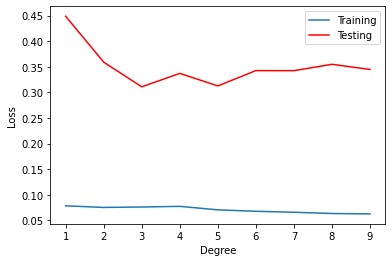

Best degree is 3


In [ ]:
plt.plot(X, Y, color = 'red', marker = "o")  
plt.title("Synthetic Data Points Generated:")  
plt.xlabel("X")  
plt.ylabel("Y")  
plt.show()  

def plot(show_fig = True):
	X_train_cost = []
	X_test_cost = []
	X_axis = range(1, 10)

	line_1 = 0
	line_2 = 0
	line_3 = 0

	for DEGREE in range(1, 10):
		try:
			W = np.load("W_"+str(DEGREE)+".npy")
		except:
			print("Please run part 1 to generate weights.")
			sys.exit(1)
		cost = 0.0
		for m in range(len(X_test)):
			X = X_test[m]
			Y = Y_test[m]
			X_power = np.array([X**j for j in range(DEGREE+1)])

			Y_pred = np.dot(W, X_power)

			cost += (Y - Y_pred)**2

		cost /= 2* (m+1)
		print("test cost, degree"+str(DEGREE)+": "+str(cost))

		X_test_cost.append(cost)


		cost = 0.0
		for m in range(len(X_train)):
			X = X_train[m]
			Y = Y_train[m]
			X_power = np.array([X**j for j in range(DEGREE+1)])

			Y_pred = np.dot(W, X_power)

			cost += (Y - Y_pred)**2

		cost /= 2* (m+1)
		print("train cost, degree"+str(DEGREE)+": "+str(cost))
		X_train_cost.append(cost)

		X_here = range(100)
		X_here = np.array(X_here, dtype=np.float) / 100
		Y_here = []	
		for m in range(len(X_here)):
			X = X_here[m]
			X_power = np.array([X**j for j in range(DEGREE+1)])

			Y_pred = np.dot(W, X_power)
			Y_here.append(Y_pred)

		if show_fig:
			plt.subplot(3,3,DEGREE)
			plt.tight_layout()
			line_1 = plt.scatter(X_train, Y_train)
			line_2 = plt.scatter(X_test, Y_test, color = "green")
			line_3 = plt.plot(X_here, Y_here, color="red")
			plt.title("Degree "+str(DEGREE))

	if show_fig:
		plt.figlegend((line_1, line_2, line_3), ("Train datapoints", "Test datapoints", "Approximated function"))
		plt.show()

		plt.plot(X_axis, X_train_cost, label = "Training")
		plt.plot(X_axis, X_test_cost, color="red", label = "Testing")
		plt.xlabel("Degree")
		plt.ylabel("Loss")
		plt.legend()
		plt.show()

	return np.argmin(X_test_cost) + 1

def call_plotter(show_fig = True):
	a = input("do you want to train (part 1) again? ")
	if (a[0] == 'y' or a[0] == 'Y'):
		a = input("do you want to regenerate the data? ")
		if (a[0] == 'y' or a[0] == 'Y'):
			num_data = int(input("Enter no of datapoints: "))
			generate_data(num_data)
		train()
		print("\n")
	return plot(show_fig)

if __name__ == "__main__":
	print("Best degree is "+ str(call_plotter()))



3.Experimenting with larger training set

do you want to auto compute an optimised degree? y
Proceeding with degree9


Data size 10: 

degree:1
cost at iteration (999/1000): 0.07907830433321247
degree:2
cost at iteration (999/1000): 0.07523594746637541
degree:3
cost at iteration (999/1000): 0.07630095672101303
degree:4
cost at iteration (999/1000): 0.08030562443380604
degree:5
cost at iteration (999/1000): 0.07437732064695875
degree:6
cost at iteration (999/1000): 0.072938811273578
degree:7
cost at iteration (999/1000): 0.07486399174251172
degree:8
cost at iteration (999/1000): 0.06956773082825873
degree:9
cost at iteration (999/1000): 0.06937977328474909

Data size 100: 

degree:1
cost at iteration (999/1000): 0.07930220140790714
degree:2
cost at iteration (999/1000): 0.07527486870487927
degree:3
cost at iteration (999/1000): 0.07686928208411314
degree:4
cost at iteration (999/1000): 0.07857892542509956
degree:5
cost at iteration (999/1000): 0.07854641513347763
degree:6
cost at iteration (999/1000): 0.07322275478375485
degree

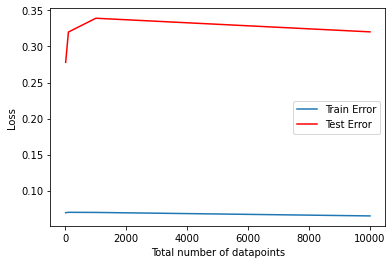

In [ ]:
def generate_data(NUM_DATA = 10):

	X = np.random.uniform(0, 1, NUM_DATA)


	noise = np.random.normal(0, 0.3, NUM_DATA)

	Y = np.sin(2 * np.pi * X) + noise

	cutoff = int(0.8 * NUM_DATA)

	perm = np.random.permutation(NUM_DATA)

	X = X[perm]
	Y = Y[perm]

	X_test = X[cutoff:]
	Y_test = Y[cutoff:]

	X_train = X[:cutoff]
	Y_train = Y[:cutoff]


def diff_data_size():
	n = 9
	a = input("do you want to auto compute an optimised degree? ")
	if (a[0] == 'y' or a[0] == 'Y'):
		show_fig = False
	else:
		a = input("do you want to enter a degree manually? ")
		if (a[0] == 'y' or a[0] == 'Y'):
			n = input("Please enter a degree (max 9): ")

	print("Proceeding with degree"+str(n))
	print("\n\nData size 10: ")
	generate_data(10)
	train_10, test_10, rmse = train(1000)
	print("\n\nData size 100: ")
	generate_data(100)
	train_100, test_100, rmse = train(1000)
	print("\n\nData size 1000: ")
	generate_data(1000)
	train_1000, test_1000, rmse = train(1000)
	print("\n\nData size 10000: ")
	generate_data(10000)
	train_10000, test_10000, rmse = train(1000)

	train_erroes = [train_10[n-1], train_100[n-1], train_1000[n-1], train_10000[n-1]]
	test_erroes = [test_10[n-1], test_100[n-1], test_1000[n-1], test_10000[n-1]]

	X_axis = [10, 100, 1000, 10000]

	plt.plot(X_axis, train_erroes, label = "Train Error")
	plt.plot(X_axis, test_erroes, color = "red", label = "Test Error")
	plt.xlabel("Total number of datapoints")
	plt.ylabel("Loss")
	plt.legend()
	plt.show()


if __name__ == "__main__":
	diff_data_size()

4.Logistic Regression

In [ ]:
data=datasets.load_breast_cancer()


LR_X=pd.DataFrame(data.data,columns=data.feature_names)
LR_Y=pd.DataFrame(data.target)

rx = (LR_X - np.min(LR_X))/(np.max(LR_X) - np.min(LR_X)).values 

rx_train,rx_test,ry_train,ry_test=tts(rx , LR_Y ,test_size=0.9,random_state=20)
xtrain=np.asarray(rx_train)
ytrain=np.asarray(ry_train)
xtest=np.asarray(rx_test)
ytest=np.asarray(ry_test)


rx1_train,rx1_test,ry1_train,ry1_test=tts(rx , LR_Y ,test_size=0.8,random_state=20)
xtrain1=np.asarray(rx1_train)
ytrain1=np.asarray(ry1_train)
xtest1=np.asarray(rx1_test)
ytest1=np.asarray(ry1_test)

rx2_train,rx2_test,ry2_train,ry2_test=tts(rx , LR_Y ,test_size=0.7,random_state=42)
xtrain2=np.asarray(rx2_train)
ytrain2=np.asarray(ry2_train)
xtest2=np.asarray(rx2_test)
ytest2=np.asarray(ry2_test)

rx3_train,rx3_test,ry3_train,ry3_test=tts(rx , LR_Y ,test_size=0.6,random_state=42)
xtrain3=np.asarray(rx3_train)
ytrain3=np.asarray(ry3_train)
xtest3=np.asarray(rx3_test)
ytest3=np.asarray(ry3_test)


rx4_train,rx4_test,ry4_train,ry4_test=tts(rx , LR_Y ,test_size=0.5,random_state=42)
xtrain4=np.asarray(rx4_train)
ytrain4=np.asarray(ry4_train)
xtest4=np.asarray(rx4_test)
ytest4=np.asarray(ry4_test)


rx5_train,rx5_test,ry5_train,ry5_test=tts(rx, LR_Y ,test_size=0.4,random_state=42)
xtrain5=np.asarray(rx5_train)
ytrain5=np.asarray(ry5_train)
xtest5=np.asarray(rx5_test)
ytest5=np.asarray(ry5_test)


alpha=0.000001
iterations=10000
def initialize(dim): 
	w = np.full((dim, 1), 0.01) 
	b = 0.0
	return w, b 

def sigmoid(rz): 
    return 1/(1 + np.exp(-rz)) 

def propogation(x_t, y_t, w, b):
       
    l = x_t.shape[1] 
  
    Z = np.dot(w.T, x_t) + b;    
    A = sigmoid(Z)
    cost= -(1/l) * np.sum(y_t * np.log(A) + (1-y_t) * np.log(1-A))
       
   
    dw = (1/l)* np.dot(x_t, (A-y_t).T)
    db = (1/l)* np.sum(A-y_t)
    
    grads= {"dw" : dw, "db" : db}
    
    return grads, cost


def optimize(x_t, y_t, w, b, iterations, alpha):
         
    for i in range(iterations):
 
        grads, cost = propogation(x_t, y_t, w, b)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - alpha * dw
        b = b - alpha * db
                    
    parameters = {"w":w, "b":b}
    grads = {"dw":dw, "db":db}
      
    return parameters, grads

def predict(x_t, w, b):
    
    l = x_t.shape[1] 
    
    y_pred =  np.zeros((1,l))
    
    w = w.reshape(x_t.shape[0], 1)
    
    A=sigmoid(np.dot(w.T, x_t)+b)
    
    
    for i in range(A.shape[1]):
        
        if(A[0,i]<0.5):
            y_pred[0,i]=0
        else:
            y_pred[0,i]=1
            
    
    return y_pred
 

def LOG_REG(Xtrain, Ytrain, iterations, alpha):
    
    dim = Xtrain.shape[0] 
    
    w,b = initialize(dim)
    
    parameters, grads = optimize(Xtrain, Ytrain, w, b, iterations, alpha) 
    
    w = parameters["w"]
    b = parameters["b"]
        
    
    d={"w":w, "b":b}
    
    return d




In [ ]:
print("\n\namount of randomly selected training data = 10% : ",) 
ans=LOG_REG(xtrain.T,ytrain.T,iterations,alpha)

w=ans["w"]
b=ans["b"]
Y_pred_train = predict(xtrain.T, w, b)
Y_pred_test = predict(xtest.T, w, b)
train=100 - np.mean(np.abs(Y_pred_train - ytrain.T))*100
test=100 - np.mean(np.abs(Y_pred_test - ytest.T))*100
print("training accuracy: {}% ".format(train))
print("testing accuracy: {} %".format(test))

print("\n\namount of randomly selected training data = 20% : ",) 

ans1=LOG_REG(xtrain1.T,ytrain1.T,iterations,alpha)

w1=ans1["w"]
b1=ans1["b"]
Y_pred_train = predict(xtrain1.T, w1, b1)
Y_pred_test = predict(xtest1.T, w1, b1)
train1=100 - np.mean(np.abs(Y_pred_train - ytrain1.T))*100
test1=100 - np.mean(np.abs(Y_pred_test - ytest1.T))*100
print("training accuracy: {}% ".format(train1))
print("testing accuracy: {} %".format(test1))


print("\n\namount of randomly selected training data = 30% : ",) 

ans2=LOG_REG(xtrain2.T,ytrain2.T,iterations,alpha)

w2=ans2["w"]
b2=ans2["b"]
Y_pred_train = predict(xtrain2.T, w2, b2)
Y_pred_test = predict(xtest2.T, w2, b2)
train2=100 - np.mean(np.abs(Y_pred_train - ytrain2.T))*100
test2=100 - np.mean(np.abs(Y_pred_test - ytest2.T))*100
print("training accuracy: {}% ".format(train2))
print("testing accuracy: {} %".format(test2))


print("\n\namount of randomly selected training data = 40% : ",) 

ans3=LOG_REG(xtrain3.T,ytrain3.T,iterations,alpha)

w3=ans3["w"]
b3=ans3["b"]
Y_pred_train = predict(xtrain3.T, w3, b3)
Y_pred_test = predict(xtest3.T, w3, b3)
train3=100 - np.mean(np.abs(Y_pred_train - ytrain3.T))*100
test3=100 - np.mean(np.abs(Y_pred_test - ytest3.T))*100
print("training accuracy: {}% ".format(train3))
print("testing accuracy: {} %".format(test3))

print("\n\namount of randomly selected training data = 50% : ",)  

ans4=LOG_REG(xtrain4.T,ytrain4.T,iterations,alpha)

w4=ans4["w"]
b4=ans4["b"]
Y_pred_train = predict(xtrain4.T, w4, b4)
Y_pred_test = predict(xtest4.T, w4, b4)
train4=100 - np.mean(np.abs(Y_pred_train - ytrain4.T))*100
test4=100 - np.mean(np.abs(Y_pred_test - ytest4.T))*100
print("training accuracy: {}% ".format(train4))
print("testing accuracy: {} %".format(test4))

print("\n\namount of randomly selected training data = 60% : ",) 

ans5=LOG_REG(xtrain5.T,ytrain5.T,iterations,alpha)

w5=ans5["w"]
b5=ans5["b"]
Y_pred_train = predict(xtrain5.T, w5, b5)
Y_pred_test = predict(xtest5.T, w5, b5)
train5=100 - np.mean(np.abs(Y_pred_train - ytrain5.T))*100
test5=100 - np.mean(np.abs(Y_pred_test - ytest5.T))*100
print("training accuracy: {}% ".format(train5))
print("testing accuracy: {} %".format(test5))
 
def write_to_csv(output):
  df_output =  pd.DataFrame(output,columns=['1. Amount of randomly selected training data','2.Training Accuracy(in %)','3.Test Accuracy(in %)'],dtype=float)
  df_output.to_csv('output.csv')
 
write_to_csv([['10%',train,test],['20%',train1,test1],['30%',train2,test2],['40%',train3,test3],['50%',train4,test4],['60%',train5,test5]])



amount of randomly selected training data = 10% : 
training accuracy: 55.357142857142854% 
testing accuracy: 63.54775828460039 %


amount of randomly selected training data = 20% : 
training accuracy: 58.4070796460177% 
testing accuracy: 63.81578947368421 %


amount of randomly selected training data = 30% : 
training accuracy: 57.64705882352941% 
testing accuracy: 64.91228070175438 %


amount of randomly selected training data = 40% : 
training accuracy: 60.79295154185022% 
testing accuracy: 64.03508771929825 %


amount of randomly selected training data = 50% : 
training accuracy: 59.859154929577464% 
testing accuracy: 65.61403508771929 %


amount of randomly selected training data = 60% : 
training accuracy: 61.29032258064516% 
testing accuracy: 64.91228070175438 %
